# QUERY 4.1A
Create a new column 'Call' , whose entries are - 
'Buy' if the stock price is below the lower Bollinger band 
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
'Short' if the stock price is above the upper Bollinger band

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
d=pd.read_csv(r'C:\Users\RACHIT\Desktop\random21.csv')
r=d.reset_index()
d=d.dropna(axis=0)
d['Call']=np.zeros(shape=(481))
# We have created the Bollinger band column in the previous problem.
for i in range(13,494): # started from 13 because we used rolling function in module 2 so values of Upper,Lower columns were Nan .So I removed all rows with Nan 
    if (d['Close Price'][i]<d['Lower'][i]):
        d['Call'][i]='Buy'
    elif ((d['Close Price'][i]>d['Lower'][i])  & (d['Close Price'][i]<d['Normal'][i])):
        d['Call'][i]='Hold Buy/ Liquidate Short'
    elif ((d['Close Price'][i]>d['Normal'][i])  & (d['Close Price'][i]<d['Upper'][i])):
        d['Call'][i]='Hold Short/ Liquidate Buy'
    else:
        d['Call'][i]='Short'
        
d.head()

,Date,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,% Dly Qt to Traded Qty,Month,Year,Mul,Day_Perc_Change,Trend,Normal,Upper,Lower,Call
13,2017-06-01,13,EICHERMOT,EQ,28435.0,28580.00,29019.45,28500.00,28700.00,28793.4,...,32.40,6,2017,1.366995e+09,1.260418,Bear drop,28287.712857,29460.012968,27115.412746,Hold Short/ Liquidate Buy
14,2017-06-02,14,EICHERMOT,EQ,28793.4,28970.00,29300.00,28900.00,29151.15,29180.1,...,49.75,6,2017,8.740607e+08,1.343016,Bear drop,28298.769286,29503.124810,27094.413762,Hold Short/ Liquidate Buy
15,2017-06-05,15,EICHERMOT,EQ,29180.1,29151.15,29385.00,29151.15,29349.00,29325.5,...,59.55,6,2017,4.935188e+08,0.498285,Slight or No change,28312.670714,29560.950284,27064.391145,Hold Short/ Liquidate Buy
16,2017-06-06,16,EICHERMOT,EQ,29325.5,29305.00,29388.70,29000.00,29200.00,29191.2,...,49.95,6,2017,4.956082e+08,-0.457963,Slight or No change,28312.926429,29561.916386,27063.936471,Hold Short/ Liquidate Buy
17,2017-06-07,17,EICHERMOT,EQ,29191.2,29195.90,29775.75,29195.90,29722.50,29713.2,...,64.02,6,2017,1.384249e+09,1.788210,Bear drop,28380.170714,29770.862856,26989.478573,Hold Short/ Liquidate Buy


# QUERY 4.1B
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [20]:
cp=d
#mapi={'Buy':1,'Hold Buy/ Liquidate Short':2,'Hold Short/ Liquidate Buy':3,'Short':4}
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

label=LabelEncoder()
cp['Call']=label.fit_transform(cp['Call'])
x=cp[['Normal','Upper','Lower','Close Price']]
y=cp['Call']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)


In [21]:
#Random Forest Classifier Algorithm
rand=RandomForestClassifier()
rand.fit(xtrain,ytrain)
print(accuracy_score(ytest,rand.predict(xtest)))

#Support Vector Algorithm
svc=SVC()
svc.fit(xtrain,ytrain)
print(accuracy_score(ytest,svc.predict(xtest)))

#Decision Tree Algorithm
tree=DecisionTreeClassifier()
tree.fit(xtrain,ytrain)
print(accuracy_score(ytest,tree.predict(xtest)))

0.7517241379310344
0.4689655172413793
0.7931034482758621


# QUERY 4.1C
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [22]:
tt1=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\MARUTI.csv')
norm=tt1['Average Price'].rolling(14).mean() # assumed 14 as in module 2
upper=((tt1['Average Price'].rolling(14).mean())+(2*tt1['Average Price'].rolling(14).std()))
lower=((tt1['Average Price'].rolling(14).mean())-(2*tt1['Average Price'].rolling(14).std()))
tt1['Normal']=norm
tt1['Upper']=upper
tt1['Lower']=lower
tt1=tt1.dropna(axis=0)
xtest1=tt1[['Normal','Upper','Lower','Close Price']]
tt1['Call']=np.zeros(shape=(483))
tt1['Call']=rand.predict(xtest1)
# we need to convert numeric to original value
tt1.replace({1:'Buy',2:'Hold Buy/ Liquidate Short',3:'Hold Short/ Liquidate Buy',4:'Short'},inplace=True)
tt1.head()
# The model was previously trained on EICHERMOT dataset and due to large difference in Close Price of MARUTI and EICHERMOT, the call is always giving 'Buy'

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Normal,Upper,Lower,Call
13,MARUTI,EQ,01-Jun-2017,7211.0,7242.0,7245.0,7110.10,7150.00,7146.6,7165.03,649217,4.651661e+09,74481,276770,42.63,6953.777143,7264.702953,6642.851333,0
14,MARUTI,EQ,02-Jun-2017,7146.6,7182.0,7187.7,7100.00,7110.60,7114.7,7135.00,310268,2.213762e+09,33719,153510,49.48,6977.931429,7288.879229,6666.983628,0
15,MARUTI,EQ,05-Jun-2017,7114.7,7139.8,7161.9,7091.10,7116.05,7125.7,7126.86,296147,2.110599e+09,31551,137016,46.27,6993.977143,7311.215576,6676.738709,0
16,MARUTI,EQ,06-Jun-2017,7125.7,7134.0,7154.3,7085.05,7118.95,7112.1,7110.16,324579,2.307810e+09,45217,197591,60.88,7006.731429,7327.504950,6685.957907,0
17,MARUTI,EQ,07-Jun-2017,7112.1,7135.0,7225.0,7107.60,7198.00,7205.7,7189.75,518152,3.725381e+09,44672,192737,37.20,7029.593571,7353.894518,6705.292625,0


# QUERY 4.2A
 Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice
Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price

Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [23]:
tt2=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\PNB.csv')
tt2['first']=np.zeros(shape=(494))
tt2['second']=np.zeros(shape=(494))
tt2['third']=np.zeros(shape=(494))
tt2['fourth']=np.zeros(shape=(494))
tt2['Action']=np.zeros(shape=(494))
for i in range(493):
    tt2['first'][i]=((tt2['Close Price'][i]-tt2['Open Price'][i])/tt2['Open Price'][i])*100
    tt2['second'][i]=((tt2['High Price'][i]-tt2['Low Price'][i])/tt2['Low Price'][i])*100
    if(tt2['Close Price'][i+1]>tt2['Close Price'][i]):
        tt2['Action'][i]=1
    if(tt2['Close Price'][i+1]<tt2['Close Price'][i]):
        tt2['Action'][i]=-1
    
tt2['third']=(tt2['Close Price'].pct_change()*100).rolling(5).mean()    
tt2['fourth']=(tt2['Close Price'].pct_change()*100).rolling(5).std()


# QUERY 4.2B
Construct a classification model with the 4 new inputs and 'Action' as target
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

0.5102040816326531


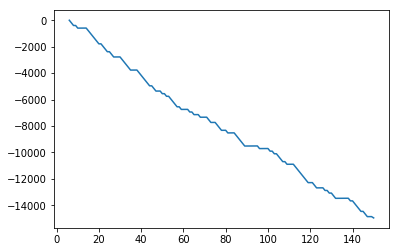

In [39]:
tt2=tt2.dropna(axis=0)
x1=tt2[['first','second','third','fourth']]
y1=tt2['Action']
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.3,random_state=2)
rand1=RandomForestClassifier()
rand1.fit(xtrain1,ytrain1)
print(accuracy_score(ytest1,rand1.predict(xtest1)))
#print((1+tt2['Action']).cumsum().plot(kind='line'))

ty=tt2['Action'].pct_change()# pct gives relative change
ty1=(tt2['Action'].pct_change())*100 # gives percent change

#print((ty1).cumsum().plot(kind='line'))
((1+ty1).cumsum().plot(kind='line')) # to get graph of net cumulative returns (in %)
#dataf=pd.DataFrame({'Percent':ty})
#print((1+ty).cumprod().plot(kind='line')) # for cumulative product return uncomment this line 
